## Import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

## Klasifikasi dataset beans dari dataset tensorflow
### <0 = Bean Rust, 1 = Angular Leaf Spot, 2 = Healthy>
- ### Input

> ### Load Dataset

In [2]:
# Download dataset
raw_train = [[], []]
for x in tfds.load("beans", data_dir='./', split='train', as_supervised=True):
    x = list(x)
    raw_train[0].append(x[0])
    raw_train[1].append(x[1])

raw_val = [[], []]
for x in tfds.load("beans", data_dir='./', split='validation', as_supervised=True):
    x = list(x)
    raw_val[0].append(x[0])
    raw_val[1].append(x[1])

raw_test = [[], []]
for x in tfds.load("beans", data_dir='./', split='test', as_supervised=True):
    x = list(x)
    raw_test[0].append(x[0])
    raw_test[1].append(x[1])

In [3]:
#Data Split

#Train
i = 0
x_train_raw = []
y_train_raw = []
for img in raw_train[0]:
    x_train_raw.append(raw_train[0][i])
    y_train_raw.append(raw_train[1][i])
    i+=1
x_train_raw = np.array(x_train_raw)
y_train_raw = np.array(y_train_raw)

#Validation
i = 0
x_val_raw = []
y_val_raw = []
for img in raw_val[0]:
    x_val_raw.append(raw_val[0][i])
    y_val_raw.append(raw_val[1][i])
    i+=1
x_val_raw = np.array(x_val_raw)
y_val_raw = np.array(y_val_raw)

#Test
i = 0
x_test_raw = []
y_test_raw = []
for img in raw_test[0]:
    x_test_raw.append(raw_test[0][i])
    y_test_raw.append(raw_test[1][i])
    i+=1
x_test_raw = np.array(x_test_raw)
y_test_raw = np.array(y_test_raw)

Data Train :


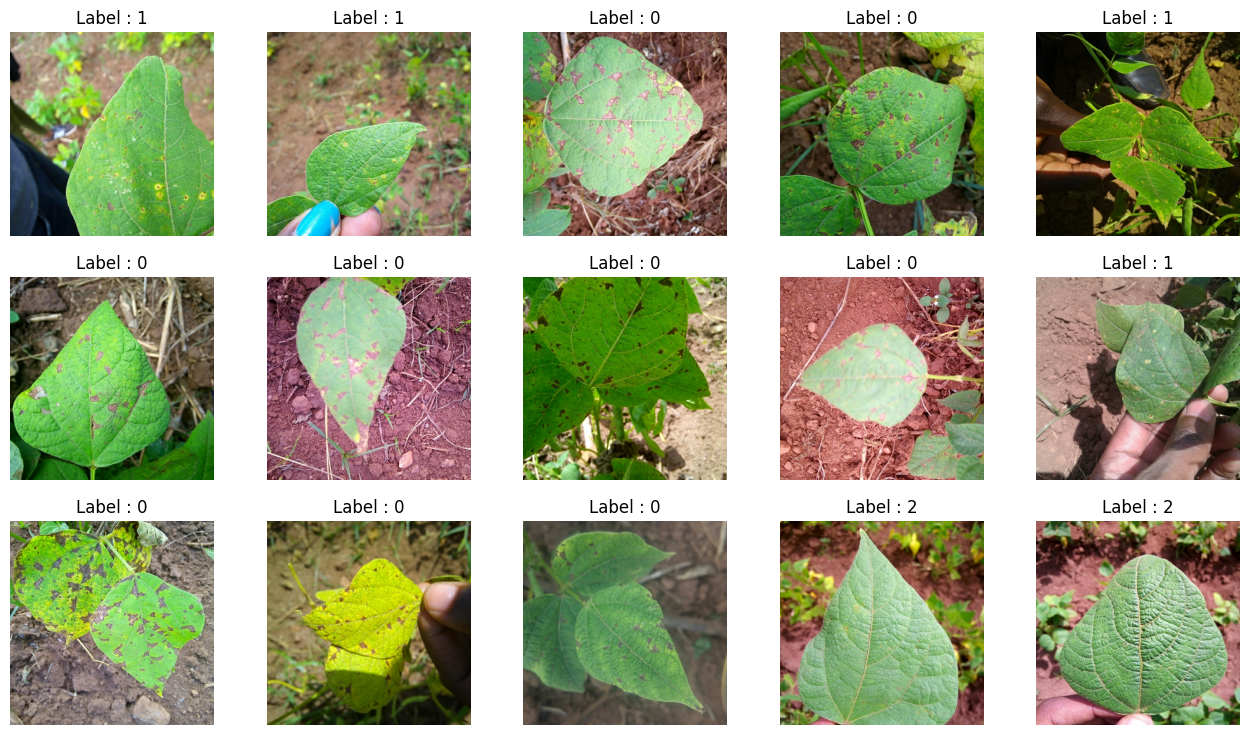

In [4]:
#check data train
print("Data Train :")
plt.figure(figsize=(16,9))
for i in range(15):
    plt.subplot(3, 5,i+1)
    plt.title(f"Label : {y_train_raw[i]}")
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

Data Validasi :


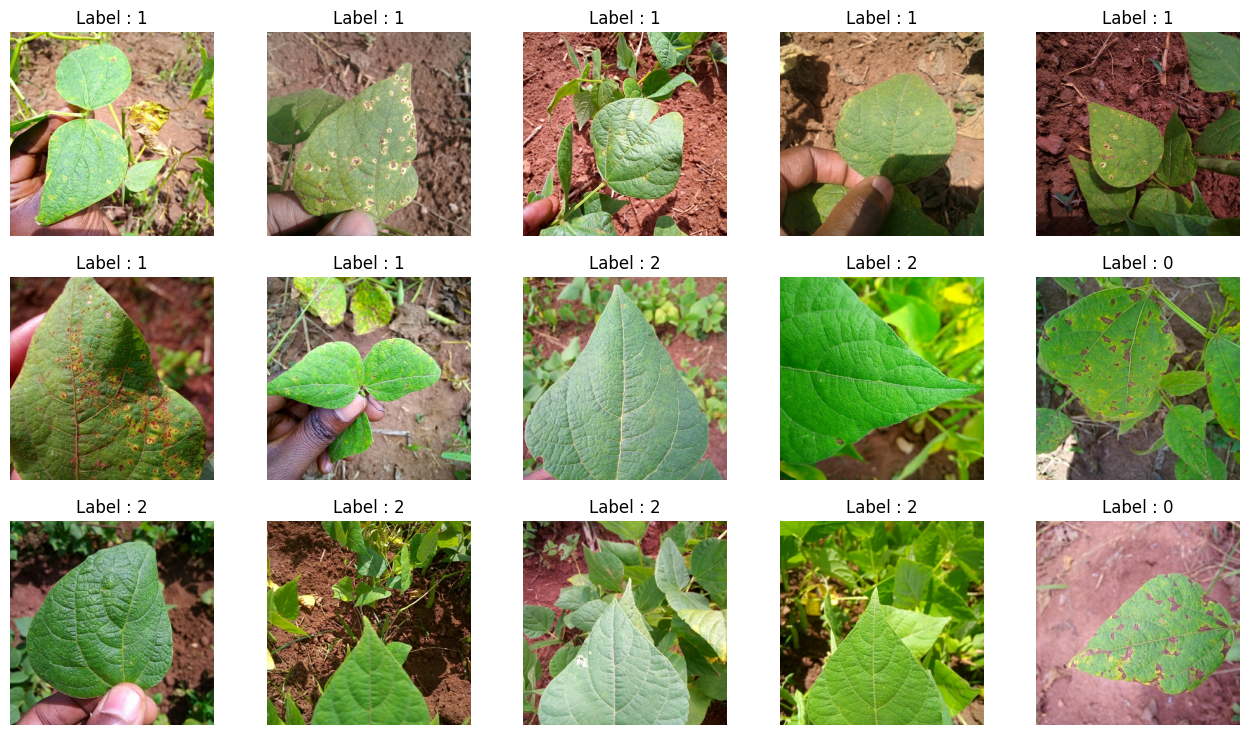

In [5]:
#check data validasi
print("Data Validasi :")
plt.figure(figsize=(16,9))
for i in range(15):
    plt.subplot(3, 5,i+1)
    plt.title(f"Label : {y_val_raw[i]}")
    plt.imshow(x_val_raw[i])
    plt.axis('off')
plt.show()

Data Test :


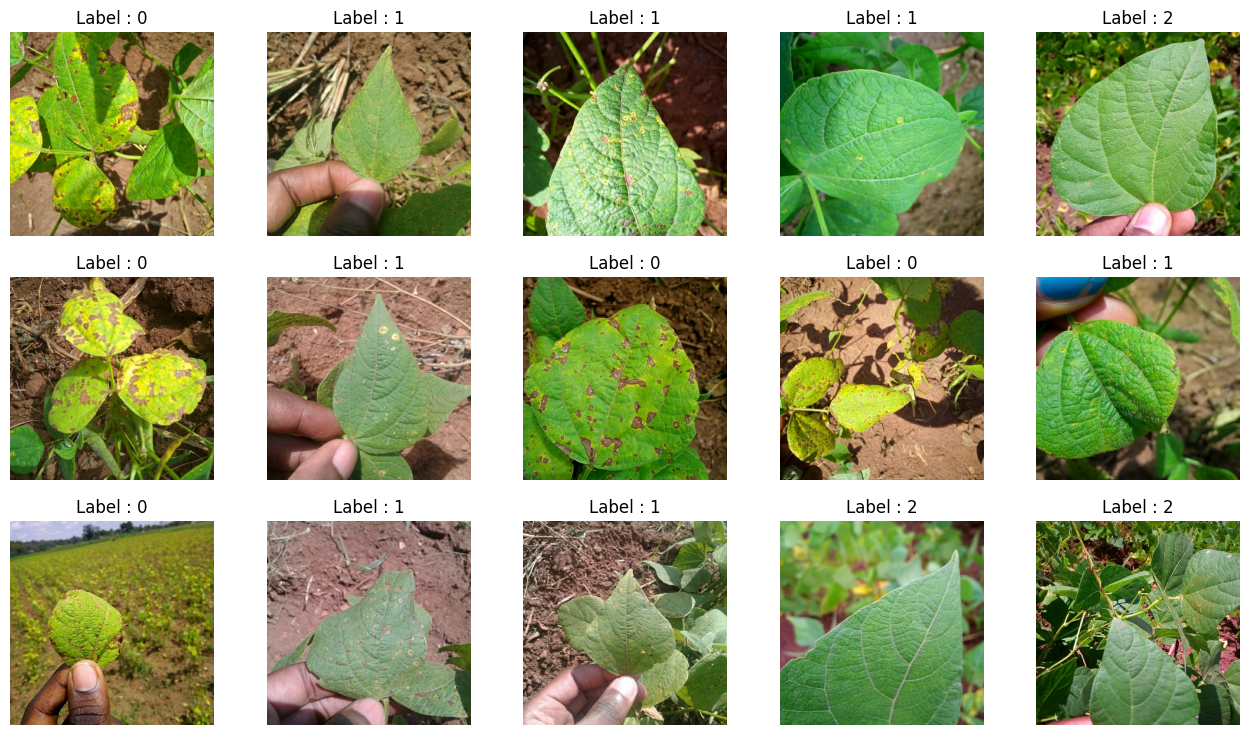

In [6]:
#check data test
print("Data Test :")
plt.figure(figsize=(16,9))
for i in range(15):
    plt.subplot(3, 5,i+1)
    plt.title(f"Label : {y_test_raw[i]}")
    plt.imshow(x_test_raw[i])
    plt.axis('off')
plt.show()

> ### Reshape Gambar dan Label

>> ### Sebelum

In [7]:
x_train_raw.shape

(1034, 500, 500, 3)

In [8]:
y_train_raw.shape

(1034,)

In [9]:
x_val_raw.shape

(133, 500, 500, 3)

In [10]:
y_val_raw.shape

(133,)

In [11]:
x_test_raw.shape

(128, 500, 500, 3)

In [12]:
y_test_raw.shape

(128,)

>> ### Sesudah

In [13]:
x_train = tf.reshape(x_train_raw, [1034, 750000])
y_train = keras.utils.to_categorical(y_train_raw, 10)
x_val = tf.reshape(x_val_raw, [133, 750000])
y_val = keras.utils.to_categorical(y_val_raw, 10)
x_test = tf.reshape(x_test_raw, [128, 750000])
y_test = keras.utils.to_categorical(y_test_raw, 10)

In [14]:
x_train.shape

TensorShape([1034, 750000])

In [15]:
len(y_train), len(y_train[0])

(1034, 10)

In [16]:
x_val.shape

TensorShape([133, 750000])

In [17]:
len(y_val), len(y_val[0])

(133, 10)

In [18]:
x_test.shape

TensorShape([128, 750000])

In [19]:
len(y_test), len(y_test[0])

(128, 10)

- ### Model

> ### Pembuatan Layer

In [20]:
model_beans = Sequential()
#Input layer
model_beans.add(Dense(128, activation='relu', input_dim=750000, name='Input'))
#Hidden layer
model_beans.add(Dense(64, activation='relu', name='Hidden1'))
model_beans.add(Dense(32, activation='relu', name='Hidden2'))
#Output layer
model_beans.add(Dense(10, activation='softmax', name='Output'))

> ### Pembuatan Callback

In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.70 and logs.get('val_accuracy') > 0.70):
            self.model.stop_training = True

callback_function = myCallback()

> ### Model Summary

In [22]:
model_beans.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               96000128  
                                                                 
 Hidden1 (Dense)             (None, 64)                8256      
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 96,010,794
Trainable params: 96,010,794
Non-trainable params: 0
_________________________________________________________________


> ### Compile Model

In [23]:
model_beans.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> ### Model Training

In [24]:
history = model_beans.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), batch_size=64, callbacks = callback_function)

Epoch 1/100
17/17 [==============================] - 21s 1s/step - loss: 25221.0938 - accuracy: 0.3085 - val_loss: 10526.5635 - val_accuracy: 0.3383
Epoch 2/100
17/17 [==============================] - 16s 920ms/step - loss: 7151.2202 - accuracy: 0.4033 - val_loss: 3216.1765 - val_accuracy: 0.5639
Epoch 3/100
17/17 [==============================] - 16s 946ms/step - loss: 3847.3330 - accuracy: 0.5338 - val_loss: 3231.7532 - val_accuracy: 0.5564
Epoch 4/100
17/17 [==============================] - 16s 948ms/step - loss: 1873.4521 - accuracy: 0.6277 - val_loss: 2991.7927 - val_accuracy: 0.5188
Epoch 5/100
17/17 [==============================] - 17s 1s/step - loss: 3393.6941 - accuracy: 0.5232 - val_loss: 4948.4961 - val_accuracy: 0.4060
Epoch 6/100
17/17 [==============================] - 16s 950ms/step - loss: 4267.4189 - accuracy: 0.4836 - val_loss: 3329.1553 - val_accuracy: 0.5414
Epoch 7/100
17/17 [==============================] - 15s 906ms/step - loss: 2066.6697 - accuracy: 0.6373

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

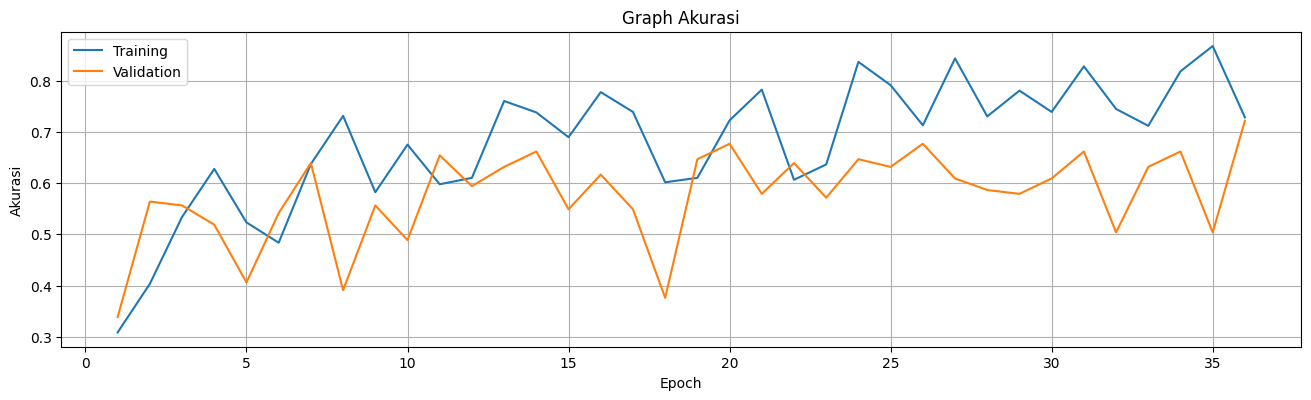

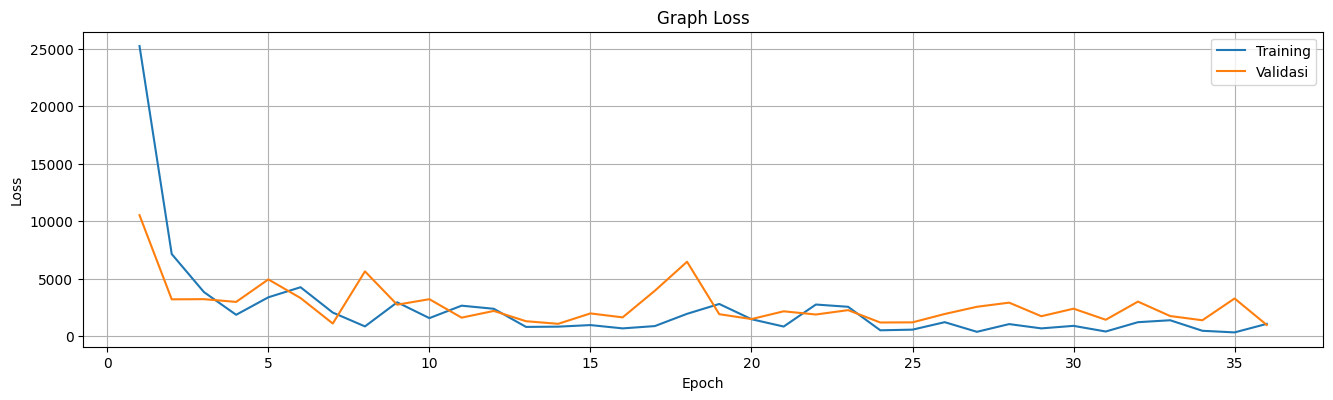

In [41]:
epochs_run = [i+1 for i in range(len(history.history['accuracy']))]

plt.figure(figsize=(16, 9))
plt.subplot(2, 1, 1)
plt.plot(epochs_run, history.history['accuracy'], label='Training')
plt.plot(epochs_run, history.history['val_accuracy'], label='Validation')
plt.grid('true')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Graph Akurasi')
plt.legend()

plt.figure(figsize=(16, 9))
plt.subplot(2, 1, 2)
plt.plot(epochs_run, history.history['loss'], label='Training')
plt.plot(epochs_run, history.history['val_loss'], label='Validasi')
plt.grid('true')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Graph Loss')
plt.legend()

plt.show()

- ### Evaluasi Model

In [48]:
score = model_beans.evaluate(x_val, y_val)
print("LOSS : ", score[0])
print(f"AKURASI : {score[1]*100}%")

5/5 [==============================] - 1s 134ms/step - loss: 989.5676 - accuracy: 0.7218
LOSS :  989.5675659179688
AKURASI : 72.18044996261597%


> ### Prediksi dengan data test

In [43]:
prediction = model_beans.predict(x_test)

4/4 [==============================] - 1s 158ms/step


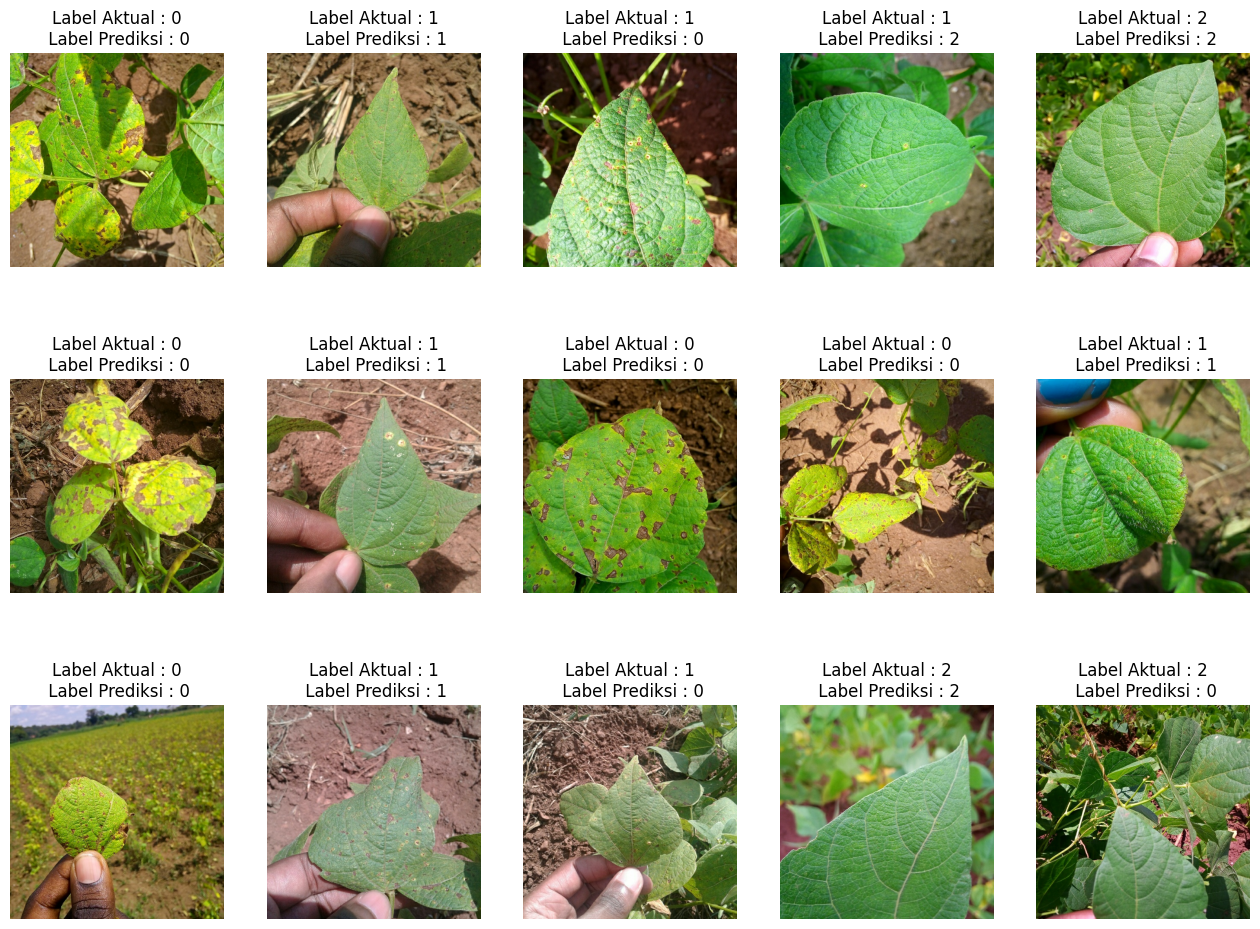

In [46]:
label = np.argmax(prediction, axis=1)
label_aktual = np.argmax(y_test[4])

plt.figure(figsize=(16, 12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    actual_label = np.argmax(y_test[i])
    plt.title(f"Label Aktual : {actual_label}\n Label Prediksi : {label[i]}")
    plt.imshow(tf.reshape(x_test[i], [500, 500, 3]))
    plt.axis('off')
plt.show()